In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import h5py
from pathlib import Path
import os
import sys
sys.path.append(os.getcwd() + '/../..')
sys.path.append(os.getcwd() + '/..')
from filepaths import filepath_from_ml_artifacts_uri
from analysis.iclr.plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
from plot_hdf5_dataset import plot_dataset
from iclr_paper_path import get_paper_path
import matplotlib
settings()
import matplotlib.pyplot as plt

In [2]:
std = np.linspace(1e-3,4, 5000)
mu = np.linspace(-3, 3, 5000)

# make grid
std_grid, mu_grid = np.meshgrid(std, mu)
var_grid = np.power(std_grid,2)
logvar_grid = np.log(var_grid)

# define kl

def kullback_leibler(mu, logvar):
    kl = -0.5 *(1 + logvar - np.power(mu,2) - np.exp(logvar))
    return kl

# compute kl
kl = kullback_leibler(mu_grid, logvar_grid)

finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\kl_heatmap.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\kl_heatmap.svg


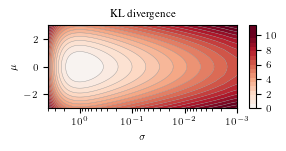

In [5]:
fontsize = 7
fig, ax = plt.subplots(1,1, figsize = fig_size(1.4, n_figs_per_width=2), constrained_layout=True)

cont = ax.contourf(std_grid, mu_grid, kl, cmap='RdBu_r', alpha=1.0, levels=20, antialiased=True, vmin = -10, vmax = 10)
ax.contour(std_grid, mu_grid, kl, colors='gray', alpha=0.8, levels=20, linewidths=0.3, antialiased=True)
# add colorbar
cbar = fig.colorbar(cont, pad=0.001, shrink=1.0, aspect=12, boundaries=np.arange(0,10,0.2), ticks=np.arange(0,12,2))

ax.set_xlabel(r'$\sigma$', fontsize=fontsize)
ax.set_ylabel(r'$\mu$', fontsize=fontsize)
ax.set_title(r'KL divergence', fontsize=fontsize+1)

# plot at level a line
level = 4
text_x = 0.01

# ax.contour(std_grid, mu_grid, kl, colors='black', alpha=0.8, levels=[level], linewidths=0.3, antialiased=True)
# # add text
# ax.text(text_x, 0.0, r'KL$={}$'.format(level), fontsize=fontsize, color='black', horizontalalignment='left')

# # add hlines at 2 and -2 for mu
# ax.axhline(2, color='black', linestyle='--', alpha=0.8, linewidth=0.3)
# ax.axhline(-2, color='black', linestyle='--', alpha=0.8, linewidth=0.3)

# # add text
# ax.text(0.1, 2.1, r'$\mu=2$', fontsize=fontsize, color='black', horizontalalignment='left')
# ax.text(0.1, -1.9, r'$\mu=-2$', fontsize=fontsize, color='black', horizontalalignment='left')

# scale axis
ax.set_xscale('log')

#flip axis
ax.invert_xaxis()

# set ticksize
ax.tick_params(axis='both', which='major', labelsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

savefig(fig, get_paper_path('VAE', 'kl_heatmap'))
